# Forest EDA

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read data

In [20]:
data = pd.read_csv('amazon.csv', encoding='latin-1')

## Questions:  
#### 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### 2. Check Last 5 Rows

In [6]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(6454, 5)

#### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


#### 5. Check For Duplicate Data and Drop Them

In [11]:
sum(data.duplicated())

32

In [12]:
data[data.duplicated()]

,year,state,month,number,date
259,2017,Alagoas,Janeiro,38.0,2017-01-01
2630,1998,Mato Grosso,Janeiro,0.0,1998-01-01
2650,1998,Mato Grosso,Fevereiro,0.0,1998-01-01
2670,1998,Mato Grosso,Março,0.0,1998-01-01
2690,1998,Mato Grosso,Abril,0.0,1998-01-01
2710,1998,Mato Grosso,Maio,0.0,1998-01-01
3586,1998,Paraiba,Janeiro,0.0,1998-01-01
3606,1998,Paraiba,Fevereiro,0.0,1998-01-01
3621,2013,Paraiba,Fevereiro,9.0,2013-01-01
3626,1998,Paraiba,Março,0.0,1998-01-01


#### 6. Check Null Values In The Dataset

In [13]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### 7. Get Overall Statistics About The Dataframe

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6454.0,2007.461729,5.746654,1998.0,2002.0,2007.0,2012.0,2017.0
number,6454.0,108.293163,190.812242,0.0,3.0,24.0,113.0,998.0


#### 8. Rename Month Names To English


In [21]:
data.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [26]:
data['month'] = data['month'].map({'Janeiro':'January', 'Fevereiro':'Febrary', 'Março':'March', 'Abril':'April', 
          'Maio':'May', 'Junho':'June', 'Julho':'July',
       'Agosto':'August', 'Setembro':'September', 'Outubro':'October', 
          'Novembro':'November', 'Dezembro':'December'})
data.month.unique()

array(['January', 'Febrary', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

#### 9. Total Number of Fires Registered


In [29]:
print(data.number.sum())
print(data.number.count())

698924.073
6454


#### 10. In Which Month Maximum Number of Forest Fires Were Reported?


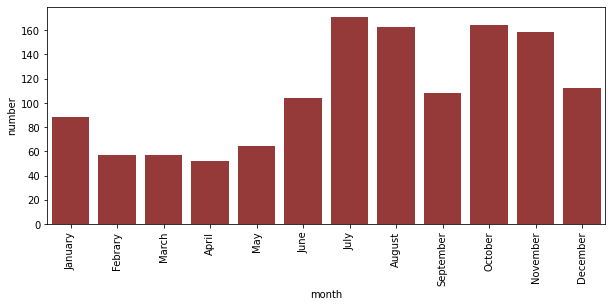

In [45]:
plt.figure(figsize = [10,4])
sns.barplot(data = data, x = 'month', y = 'number',ci= None, color = 'Brown' )
plt.xticks(rotation = 'vertical')
plt.show()

In [89]:
data.groupby('month', as_index = False)['number'].sum()

,month,number
0,April,28188.770
1,August,88050.435
2,December,57535.480
3,Febrary,30848.050
4,January,47747.844
5,July,92326.113
6,June,56010.675
7,March,30717.405
8,May,34731.363
9,November,85508.054


#### 11. In Which Year Maximum Number of Forest Fires Was Reported?


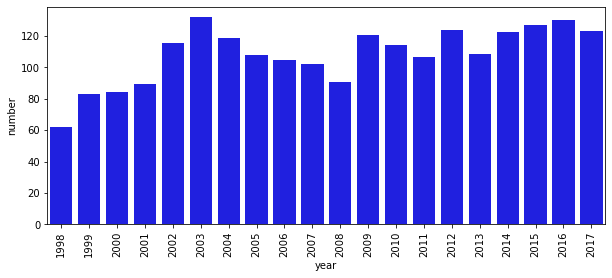

In [48]:
plt.figure(figsize = [10,4])
sns.barplot(data = data, x = 'year', y = 'number',ci= None, color = 'Blue' )
plt.xticks(rotation = 'vertical')
plt.show()

#### 12. In Which State Maximum Number of Forest Fires Was Reported?


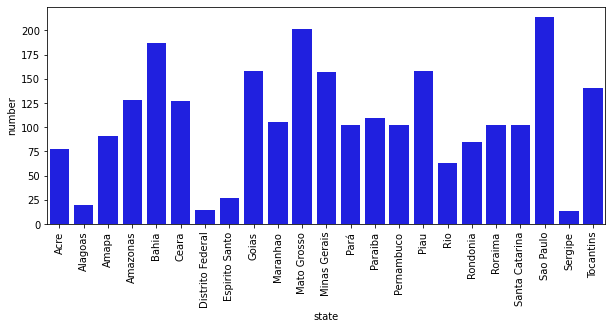

In [49]:
plt.figure(figsize = [10,4])
sns.barplot(data = data, x = 'state', y = 'number',ci= None, color = 'Blue' )
plt.xticks(rotation = 'vertical')
plt.show()

#### 13. Find Total Number of Fires Were Reported In Amazonas


In [56]:
len(data.query('state=="Amazonas"'))

239

#### 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)


In [58]:
amazonas = data.query('state=="Amazonas"')
amazonas.head()

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01


In [64]:
amazonas.groupby('year', as_index = False)['number'].sum()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


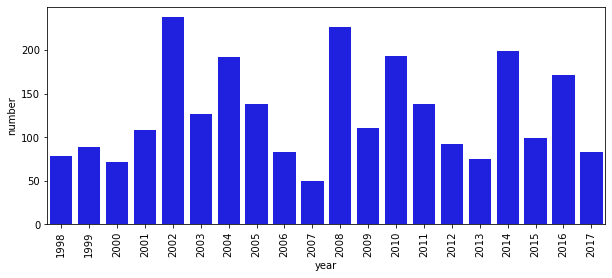

In [90]:
plt.figure(figsize = [10,4])
sns.barplot(data = amazonas, x = 'year', y = 'number',ci= None, color = 'Blue' )
plt.xticks(rotation = 'vertical')
plt.show()

#### 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)


In [83]:
amazonas.head()

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01
720,2000,Amazonas,January,7.0,2000-01-01
721,2001,Amazonas,January,3.0,2001-01-01
722,2002,Amazonas,January,17.0,2002-01-01


In [88]:
amazonas['days']= pd.to_datetime(amazonas.date).dt.day_name()
amazonas.head()

C:\Users\User\AppData\Local\Temp\ipykernel_228\42789679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazonas['days']= pd.to_datetime(amazonas.date).dt.day_name()


,year,state,month,number,date,days
718,1998,Amazonas,January,0.0,1998-01-01,Thursday
719,1999,Amazonas,January,3.0,1999-01-01,Friday
720,2000,Amazonas,January,7.0,2000-01-01,Saturday
721,2001,Amazonas,January,3.0,2001-01-01,Monday
722,2002,Amazonas,January,17.0,2002-01-01,Tuesday


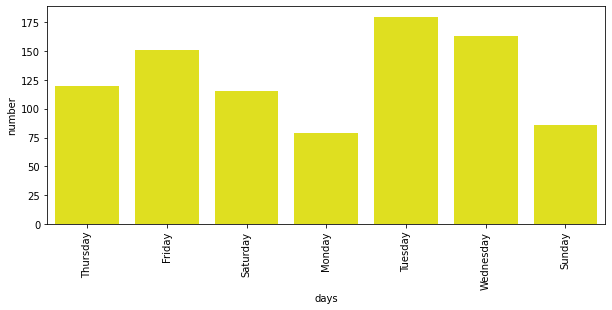

In [92]:
plt.figure(figsize = [10,4])
sns.barplot(data = amazonas, x = 'days', y = 'number',ci= None, color = 'Yellow' )
plt.xticks(rotation = 'vertical')
plt.show()

#### 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’


In [81]:
year_2015 = data.query('year==2015 & number>0')
year_2015.head()

,year,state,month,number,date
17,2015,Acre,January,1.0,2015-01-01
37,2015,Acre,Febrary,2.0,2015-01-01
57,2015,Acre,March,2.0,2015-01-01
77,2015,Acre,April,3.0,2015-01-01
97,2015,Acre,May,2.0,2015-01-01


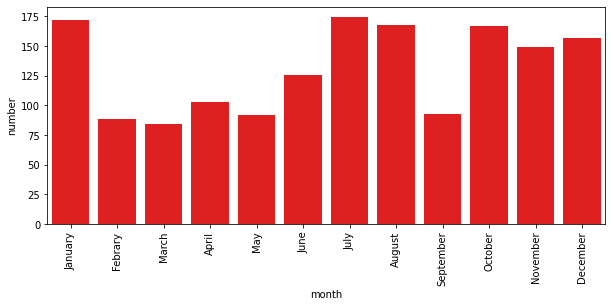

In [82]:
plt.figure(figsize = [10,4])
sns.barplot(data = year_2015, x = 'month', y = 'number', ci= None, color = 'Red')
plt.xticks(rotation = 'vertical')
plt.show()

#### 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)


In [100]:
data.groupby('state', as_index=False)['number'].mean().sort_values(by= 'number', ascending = False)

,state,number
20,Sao Paulo,213.896226
10,Mato Grosso,201.351523
4,Bahia,187.222703
15,Piau,158.174674
8,Goias,157.721841
11,Minas Gerais,156.800243
22,Tocantins,141.037176
3,Amazonas,128.243218
5,Ceara,127.314071
12,Paraiba,109.698573


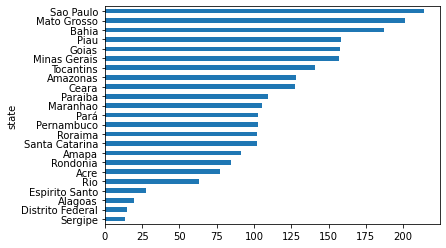

In [105]:
data.groupby('state')['number'].mean().sort_values().plot(kind = 'barh');

#### 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [79]:
dec_month = data.query('month=="December" & number>0')
dec_month.head()

,year,state,month,number,date
220,1998,Acre,December,7.0,1998-01-01
224,2002,Acre,December,1.0,2002-01-01
225,2003,Acre,December,1.0,2003-01-01
226,2004,Acre,December,7.0,2004-01-01
227,2005,Acre,December,2.0,2005-01-01


In [80]:
dec_month.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [106]:
dec_month.state.nunique()

23